# 15 UNDERSTANDING EXPERIMENTAL DATA

This chapter is all about <b>understanding experimental data</b>. 

We will make extensive use of plotting to visualize the data, and will return to the topic of what is and what is not a valid statistical conclusion. We will also talk about the interplay between physical and computational experiments.

## 15.1 The Behavior of Springs

Springs are wonderful things. 

In 1676 the British physicist Robert Hooke formulated <b>Hooke’s law</b> of elasticity: Ut tensio, sic vis, in English,

$F = -kx$

All springs have an <b>elastic limit</b>, beyond which the law fails. 

The constant of proportionality, `k`, is called <b>the spring constant</b>.

Knowing the <b>spring constant</b> of a particular spring can be <b>a matter of some import</b>

Generations of physics students have learned to estimate spring constants using an experimental apparatus similar to that pictured here. 

The basic idea is toestimate the force stored in the spring by <b>measuring the displacement caused by exerting a known force on the spring</b>.

<img src="./img/spring.PNG"/> 

The difference between the two distances then becomes the value of <b>x</b> in Hooke’s law.

We know that the force, <b>F</b>, being exerted on the spring is equal to the mass, <b>m</b>, multiplied by the acceleration due to gravity, <b>g</b> (9.81 m/s2 is a pretty good approximation of g on this planet), 
so we substitute <b>m*g for F</b>. 

By simple algebra,we know that <b>k</b>:

$k = -(m*g)/x$

#### robust experiment

A more <b>robust experiment</b> is to hang <b>a series of increasingly heavier weights</b> on the spring, measure the stretch of the spring each time, and plot the results.

We ran such an experiment,and typed the results into a file named `./src/springData.txt`:


In [1]:
%%file ./src/springData.txt
Distance (m) Mass (kg)
0.0865 0.1
0.1015 0.15
0.1106 0.2
0.1279 0.25
0.1892 0.3
0.2695 0.35
0.2888 0.4
0.2425 0.45
0.3465 0.5
0.3225 0.55
0.3764 0.6
0.4263 0.65
0.4562 0.7
0.4502 0.75
0.4499 0.8
0.4534 0.85
0.4416 0.9
0.4304 0.95
0.437 1.0

Overwriting ./src/springData.txt


In [ ]:
# %load './src/springData.txt'
./src/springData.txt

In [3]:
%%file ./src/springData.csv
Distance(m),Mass(kg)
0.0865,0.1
0.1015,0.15
0.1106,0.2
0.1279,0.25
0.1892,0.3
0.2695,0.35
0.2888,0.4
0.2425,0.45
0.3465,0.5
0.3225,0.55
0.3764,0.6
0.4263,0.65
0.4562,0.7
0.4502,0.75
0.4499,0.8
0.4534,0.85
0.4416,0.9
0.4304,0.95
0.437,1.0

Overwriting ./src/springData.csv


## Comma-separated values

https://en.wikipedia.org/wiki/Comma-separated_values
    
In computing, a comma-separated values (**CSV**) file stores **tabular** data (numbers and text) in **plain text**.

* Each **line** of the file is a data **record**
. 
* Each **record** consists of one or more **fields**, separated by **commas**.    

CSV is **a common data exchange format** that is widely supported by consumer, business, and scientific applications. 

For example, a user may need to transfer information from a **database** program that stores data in a proprietary format, to a **spreadsheet** that uses a completely different format. 

The database program most likely can export its data as "CSV"; the exported CSV file can then be imported by the spreadsheet program.

In [ ]:
# %load './src/springData.csv'
Distance(m),Mass(kg)
0.0865,0.1
0.1015,0.15
0.1106,0.2
0.1279,0.25
0.1892,0.3
0.2695,0.35
0.2888,0.4
0.2425,0.45
0.3465,0.5
0.3225,0.55
0.3764,0.6
0.4263,0.65
0.4562,0.7
0.4502,0.75
0.4499,0.8
0.4534,0.85
0.4416,0.9
0.4304,0.95
0.437,1.0

Extracting the data from a file and returns lists containing the distances and masses 


In [17]:
#Page 209, Figure 15.1
def getData(fileName):
    dataFile = open(fileName, 'r')
    distances = []
    masses = []
    discardHeader = dataFile.readline()
    for line in dataFile:
        #d, m = line.split(' ')
        d, m = line.split(',')
        #d, m = line.split()  # 
        distances.append(float(d))
        masses.append(float(m))
    dataFile.close()
    return (masses, distances)

In [18]:
#inputFile='./src/springData.txt'
inputFile='./src/springData.csv'
masses, distances = getData(inputFile)

The function  `plotData` uses the experimental data from  the file and then plots it.


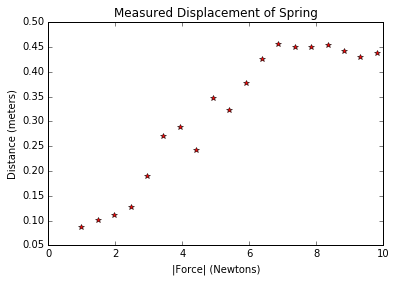

In [20]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

#Page 209, Figure 15.2
def plotData(masses, distances):
    masses = np.array(masses)
    distances = np.array(distances)
    forces = masses*9.81
    
    plt.plot(forces, distances, 'r*')
    plt.title('Measured Displacement of Spring')
    plt.xlabel('|Force| (Newtons)')
    plt.ylabel('Distance (meters)')

plotData(masses, distances)

This is not what Hooke’s law predicts

Measurement error is to be expected, so we should expect the points to lie around a line rather than on it.

It would be nice to see a line that represents <b>our best guess</b> of where the points would have been <b>if we had no measurement error</b>. 

This is to <b>fit a line to the data</b>.



### 15.1.1 Using Linear Regression to Find a Fit

<b>Objective function</b> provides a quantitative assessment of how well the curve fits the data.

The most commonly used objective function is called <b>least squares</b>,The objective function is then defined as

$\sum_{i=0}^{len(observed)-1}(observed[i]-predicted[i])^2$

####  numpy.polyfit

http://docs.scipy.org/doc/numpy/reference/generated/numpy.polyfit.html

`Numpy` provides a function, `polyfit`, that finds the best Least squares polynomial fit.

Fit a polynomial

$p(x) = p[0] * x**deg + ... + p[deg]$

of degree deg to points (x, y). 

Returns a vector of coefficients p that minimises the squared error.

```python

numpy.polyfit(x, y, deg, rcond=None, full=False, w=None, cov=False)

numpy.polyfit(observedXVals, observedYVals, n)

numpy.polyfit(observedXVals, observedYVals, 1) # y = ax + b

numpy.polyfit(observedXVals, observedYVals, 2) # y = ax^2 + bx+c
```
The algorithm used by polyfit is called <b>linear regression</b>.

The function fitData in Figure 15.3 extends the `plotData` function in Figure 15.2 by adding a line that represents the best fit for the data.

The function also computes the spring constant, `k`.

There is an asymmetry in the way `forces` and `distance` are treated. 

The values in `forces` are treated as <b>independent</b>,and used to produce the values in <b>the dependent variable</b> `predictedDistances` (a prediction of the displacements produced by suspending the mass).


In [14]:
import numpy as np

x = np.array([0.0, 1.0, 2.0, 3.0,  4.0,  5.0])
y = np.array([0.0, 0.8, 0.9, 0.1, -0.8, -1.0])
z = np.polyfit(x, y, 3)
z

array([ 0.08703704, -0.81349206,  1.69312169, -0.03968254])

In [15]:
def linearfitData( masses, distances):
    distances = np.array(distances)
    masses = np.array(masses)
    forces = masses*9.81
    #find linear fit
    a,b = np.polyfit(forces, distances, 1)
    predictedDistances = a*np.array(forces) + b
    
    return a,b,predictedDistances

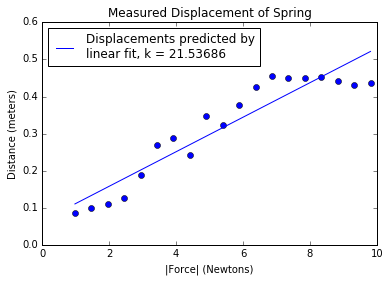

In [16]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

def plotlinearfitData(a, masses, predictedDistance):
    masses = np.array(masses)
    forces = masses*9.81
    # the spring constant, k
    k = 1.0/a
    
    plt.plot(forces, predictedDistances,
               label = 'Displacements predicted by\nlinear fit, k = '
               + str(round(k, 5)))
   
    plt.legend(loc = 'best')

plotData(masses, distances)
a,b,predictedDistances=linearfitData( masses, distances)
plotlinearfitData(a,masses,predictedDistances)    

It is interesting to observe that <b>very few points</b> actually lie on the least-squares fit.

It doesn’t look like a great fit. Let’s try a `cubic fit` 

In [ ]:
def cubfitData(masses, distances):
    distances = np.array(distances)
    masses = np.array(masses)
    forces = masses*9.81

    #add cubit fit
    a,b,c,d = np.polyfit(forces, distances, 3)
    predictedDistances = a*(forces**3) + b*forces**2 + c*forces + d
    
    return a,b,c,d,predictedDistances


In [ ]:
#Page 212, Figure 15.3
import numpy as np
import matplotlib.pyplot as plt

def plotcubfitData(masses, distances):
    masses = np.array(masses)
    forces = masses*9.81
    #add cubit fit
  
    plt.plot(forces, predictedDistances, 'b:', label = 'cubic fit')

    plt.legend(loc = 'best')

plotData(masses, distances)
a,b,predictedDistances=linearfitData( masses, distances)
plotlinearfitData(a,masses,predictedDistances)

a,b,c,d,predictedDistances=cubfitData(masses, distances)
plotcubfitData(masses, distances)

The cubic fit <b>looks like</b> a much better model of the data, but is it? <b>Probably not</b>.

The <b>raw data</b> merely an indication of <b>experimental error</b>. This can be dangerous.

Recall that we started with a theory that there should be <b>a linear relationship</b> between the x and y values, not
a cubic one.

Let’s see what happens if we use our cubic fit to predict where the point corresponding to <b>1.5kg</b> would lie.


In [ ]:
#Page 212, Figure 15.3
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

def outsidefitData(a,b,c,d,outsidepoints,masses, distances):
    masses=masses+outsidepoints
    masses = np.array(masses)
    forces = masses*9.81
    # predict where the point corresponding to 1.5kg would lie  
    predictedDistances = a*(forces**3) + b*forces**2 + c*forces + d
    plt.plot(forces, predictedDistances, 'b:', label = 'cubic fit')

    plt.legend(loc = 'best')

inputFile='./src/springData.txt'
masses, distances = getData(inputFile)
plotData(masses, distances)

a,b,c,d,predictedDistances=cubfitData(masses, distances)
# predict where the point corresponding to 1.5kg would lie  
outsidepoints=[1.1,1.2,1.3,1.4,1.5]
outsidefitData(a,b,c,d,outsidepoints,masses, distances)
        

we have is an example of <b>overfitting</b>.

we recall that <b>Hooke’s law</b> holds only up to some <b>elastic limit</b>. 

Perhaps that limit is reached for this spring somewhere around <b>7N</b> (approximately 0.7kg).

Let’s see what happens if we eliminate the last six points by replacing the second and third lines of fitData by

```python
 distances[:-6]
  masses[:-6]
```


In [ ]:
#Page 212, Figure 15.3
import numpy as np
import matplotlib.pyplot as plt

inputFile='./src/springData.txt'
masses, distances = getData(inputFile)

masses=masses[:-6]
distances=distances[:-6]

plotData(masses, distances)
a,b,predictedDistances=linearfitData(masses, distances)
plotlinearfitData(a,masses,predictedDistances)

a,b,c,d,predictedDistances=cubfitData(masses, distances)
plotcubfitData(masses, distances)

Eliminating those points certainly makes a <b>difference</b>, e.g., k has dropped dramatically and the linear and cubic fits are almost  <b>indistinguishable</b>. 

But how do we know which of the two linear fits is a better representation of how our spring performs up to its elastic limit? 

One should never throw out experimental results <b>merely to get a better fit</b>. 


## 15.2 The Behavior of Projectiles

We decided to use one of our springs to build a device capable of launching a projectile.

We measured <b>the height of the projectile at various distances from the launch point</b>.

The data was stored in a file **'./src/projectileData.txt'** with the contents

```
      Distance trial1  trial2 trial3  trial4
      1080     0        0      0       0
      1044     2.25     3.25   4.5     6.5
      
      
      0        0        0       0       0
```


In [ ]:
# %load './src/projectileData.txt'
Distance  	trial1	trial2	trial3	trial3	
1080	  	0.0	    0.0		0.0		0.0
1044		2.25	3.25	4.5		6.5	
1008		5.25	6.5		6.5		8.75
972			7.5		7.75	8.25	9.25
936			8.75	9.25	9.5		10.5
900			12.0	12.25	12.5	14.75
864			13.75	16.0	16.6	16.5
828			14.75	15.25	15.5	17.5
792			15.5	16.0	16.6	16.75
756			17.0	17.0	17.5	19.25
720			17.5	18.5	18.5	19.0
540			19.5	18.5	19.0	19.0
360			18.5	18.5	19.0	19.0
180			13.0	13.0	13.0	13.0
0			0.0		0.0		0.0		0.0


The code in Figure 15.4 was used to plot the mean altitude of the projectile against the distance from the point of launch. It also plots the best linear and quadratic fits to the points.

In [13]:
def getTrajectoryData(fileName):
    dataFile = open(fileName, 'r')
    distances = []
    heights1, heights2, heights3, heights4 = [],[],[],[]
    discardHeader = dataFile.readline()
    for line in dataFile:
        d, h1, h2, h3, h4 = line.split()
        distances.append(float(d))
        heights1.append(float(h1))
        heights2.append(float(h2))
        heights3.append(float(h3))
        heights4.append(float(h4))
    dataFile.close()
    return (distances, [heights1, heights2, heights3, heights4])

In [14]:
fileName='./src/projectileData.txt'
distances, heights = getTrajectoryData(fileName)

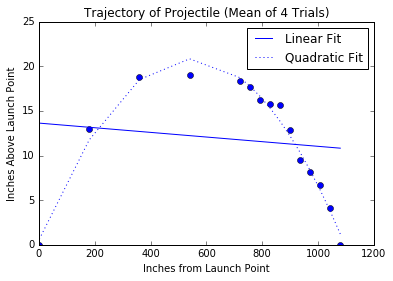

In [15]:
#Page 215, Figure 15.4
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

def processTrajectories(distances, heights):
    numTrials = len(heights)
    distances = np.array(distances)
    
    #Get array containing mean height at each distance
    totHeights =np.array([0]*len(distances))
    for h in heights:
        totHeights = totHeights +np.array(h)
    meanHeights = totHeights/len(heights)
    plt.title('Trajectory of Projectile (Mean of '\
                + str(numTrials) + ' Trials)')
    plt.xlabel('Inches from Launch Point')
    plt.ylabel('Inches Above Launch Point')
    plt.plot(distances, meanHeights, 'bo')
    
    a,b = np.polyfit(distances, meanHeights, 1)
    
    altitudes = a*distances + b
    plt.plot(distances, altitudes, 'b', label = 'Linear Fit')
    
    a,b,c = np.polyfit(distances, meanHeights, 2)
    
    altitudes = a*(distances**2) +  b*distances + c
    plt.plot(distances, altitudes, 'b:', label = 'Quadratic Fit')
    plt.legend()

processTrajectories(distances, heights)

A quick look at the plot on the right makes it quite clear that a quadratic fit is far better than a linear one

#####  how bad a fit is the line and how good is the quadratic fit?

### 15.2.1 Coefficient of Determination

Asking about <b>the goodness of a fit</b> is equivalent to asking about the accuracy of these predictions.

<b>The mean square error</b> is useful for comparing the <b>relative goodness</b> of two fits to the same data, 

it is <b>not particularly useful for getting a sense of the absolute goodness of a fit</b>.

We can calculate <b>the absolute goodness of a fit</b> using the <b>coefficient of determination</b>, often written as $R^2$

Let $y_i$ be the $i^{th}$ observed value, $p_i$ be the corresponding value predicted by model, and $\mu$ be the mean of the observed values.

$R^2=1-\frac{\sum_{i}(y_i-p_i)^2}{\sum_{i}(y_i-\mu)^2}$

By comparing

<b>the estimation errors</b> (<b>RSS: residual sum of squares</b>,the numerator) 

with

<b>the variability of the original values</b> ( <b>TSS: total sum of squares</b>,the denominator), 

$R^2$ is intended to capture <b>the proportion of variability </b> in a data set that is accounted for by the statistical model provided by the fit.

Its <b>compactness</b> stems from the expressiveness of the operations on <b>arrays</b>.

In [ ]:
#Page 216, Figure 15.5
def rSquared(measured, predicted):
    """Assumes measured a one-dimensional array of measured values
               predicted a one-dimensional array of predicted values
       Returns coefficient of determination"""
    # RSS: residual sum of squares
    estimateError = ((predicted - measured)**2).sum()
    
    meanOfMeasured = measured.sum()/float(len(measured))
    
    # TSS: total sum of squares
    variability = ((measured - meanOfMeasured)**2).sum()
    
    return 1 - estimateError/variability

In [ ]:
#Page 215, Figure 15.4
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

def processTrajectories(distances, heights):
    
    numTrials = len(heights)
    distances = np.array(distances)
    
    #Get array containing mean height at each distance
    totHeights = np.array([0]*len(distances))
    for h in heights:
        totHeights = totHeights + np.array(h)
    
    meanHeights = totHeights/len(heights)
    
    plt.title('Trajectory of Projectile (Mean of '
                + str(numTrials) + ' Trials)')
    plt.xlabel('Inches from Launch Point')
    plt.ylabel('Inches Above Launch Point')
    plt.plot(distances, meanHeights, 'bo')
    
    a,b = np.polyfit(distances, meanHeights, 1)
    
    altitudes = a*distances + b
    
    residuals1=rSquared(meanHeights, altitudes)
    
    plt.plot(distances, altitudes, 'b', label = 'Linear Fit, $R^2$='+str(residuals1))
  
    #      full=True
    # Least-squares solution, residuals, rank, singular_values, rcond 
    solution,residuals,rank,s,rcond= np.polyfit(distances, meanHeights, 2,full=True)
  
    altitudes = solution[0]*(distances**2) +  solution[1]*distances + solution[2]
    
    r2quad=rSquared(meanHeights, altitudes)
    
    plt.plot(distances, altitudes, 'b:', label = 'Quadratic Fit, $R^2$='+str(r2quad))
    
    plt.legend()
    
processTrajectories(distances, heights)

This tells us that 

1 less than 2% of the variation in the measured data can be explained by the linear model,

2 more than 98% of the  variation can be explained by the quadratic model

### 15.2.2 Using a Computational Mode

One interesting question is <b>the horizontal speed</b> at which the projectile is traveling when it hits the target. 

We might use the following train of thought to design <b>a computation</b> that answers this question:
    

1 Its <b>peak</b> occurs halfway  between the launch point and the target; call this value $xMid$. 
The peak height, 

 $yPeak=a*xMid^2+b*xMid+c$
 
2  we can compute <b>the amount of time</b> it takes for the projectile to <b>fall from $yPeak$ to
the height of the target</b>, because that is purely a function of gravity. It is  given by the equation:

$t=\sqrt{\frac{2*yPeak}{g}}$

https://en.wikipedia.org/wiki/Equations_for_a_falling_body

3 Given the time to go from $xMid$ to the target, we can easily compute the average horizontal speed of the projectile over that interval. 
we can use the average horizontal speed as an estimate of the horizontal speed when the projectile hits the target
  

In [ ]:
#Page 218, Figure 15.6
def getHorizontalSpeed(a, b, c, minX, maxX):
    """Assumes minX and maxX are distances in inches
       Returns horizontal speed in feet per second"""
    inchesPerFoot = 12.0
    
    xMid = (maxX - minX)/2.0
    yPeak = a*xMid**2 + b*xMid + c
    
    g = 32.16*inchesPerFoot #accel. of gravity in inches/sec/sec
    
    t = (2*yPeak/g)**0.5
    print('Horizontal speed =', int(xMid/(t*inchesPerFoot)), 'feet/sec')


In [ ]:
#Page 215, Figure 15.4
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

def processTrajectories(distances, heights):

    numTrials = len(heights)
    distances = np.array(distances)
    
    #Get array containing mean height at each distance
    totHeights = np.array([0]*len(distances))
    for h in heights:
        totHeights = totHeights + np.array(h)
    meanHeights = totHeights/len(heights)
    
    plt.title('Trajectory of Projectile (Mean of '\
                + str(numTrials) + ' Trials)')
    plt.xlabel('Inches from Launch Point')
    plt.ylabel('Inches Above Launch Point')
    plt.plot(distances, meanHeights, 'bo')
    
    a,b = np.polyfit(distances, meanHeights, 1)
    
    altitudes = a*distances + b
    
    r2linear=rSquared(meanHeights, altitudes)
        
    plt.plot(distances, altitudes, 'b', label = 'Linear Fit, $R^2$='+str(r2linear))
    
    a,b,c = np.polyfit(distances, meanHeights, 2)
    altitudes = a*(distances**2) +  b*distances + c
    
    r2quad=rSquared(meanHeights, altitudes)
        
    plt.plot(distances, altitudes, 'b:', label = 'Quadratic Fit, $R^2$='+str(r2quad))
    
    plt.legend()
    
    getHorizontalSpeed(a, b, c, distances[-1],distances[0])
    
    
processTrajectories(distances, heights)

The sequence of steps we have just worked through follows <b>a common pattern</b> 

1.  We started by performing <b>an experiment</b> to get some data about <b>the behavior</b> of a physical system.

2. We then used computation to <b>find</b> and <b>evaluate</b> the quality of <b>a model</b> of the behavior of the system.

3. Finally, we used some <b>theory and analysis</b> to design a simple <b>computation</b> to derive an interesting <b>consequence of the model</b>.

## 15.3 Fitting Exponentially Distributed Data 

Polyfit uses linear regression to find a polynomial of a given degree that is the best least-squares fit for some data. 

But this is not always possible. Consider, for example, the simple <b>exponential growth function</b> $y = 2^x$.

The code in Figure 15.7 fits a 4th-degree polynomial to the first ten points and plots the results.

In [ ]:
#Page 218, Figure 15.7
%matplotlib inline

import numpy
import matplotlib.pyplot as plt

vals = []
for i in range(10):
    vals.append(2**i)
plt.plot(vals,'bo', label = 'Actual points')

xVals = np.arange(10)

a,b,c,d,e = np.polyfit(xVals, vals, 4)

yVals = a*(xVals**4) + b*(xVals**3) + c*(xVals**2)+ d*xVals + e

plt.plot(yVals, 'bx', label = 'Predicted points', markersize = 20)
plt.title('Fitting $y = 2^x$')
plt.legend(loc='best')
plt.show()

The fit is clearly a good one, for these data points. However, let’s look at what  the model predicts for $2^{20}$

In [ ]:
pred2to20 = a*(20**4) + b*(20**3) + c*(20**2)+ d*20 + e
print('Model predicts that 2**20 is roughly', round(pred2to20))
print('Actual value of 2**20 is', 2**20)

##### It is because no polynomial is a good fit for an exponential distribution.

we can use polyfit to find a curve that fits the original independent values and the <b>log</b> of the dependent values

If a function $y = f(x)$, exhibits exponential growth, the $log$ (to any base) of $f(x)$ grows linearly. 

This can be visualized by plotting an exponential function with a logarithmic y-axis.

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

xVals, yVals = [], []
for i in range(10):
    xVals.append(i)
    yVals.append(2**i)
plt.plot(xVals, yVals)
plt.semilogy()
plt.show()

The fact that taking <b>the log of an exponential function</b> produces <b>a linear function</b> can be used to construct a model for an exponentially distributed set of data points.

In [ ]:
#Page 220, Figure 15.8
%matplotlib inline

import math
import numpy as np
import matplotlib.pyplot as plt

#define an arbitrary exponential function
def f(x):
    return 3*(2**(1.2*x))

def createExpData(f, xVals):
    """Asssumes f is an exponential function of one argument
                xVals is an array of suitable arguments for f
       Returns array containing results of applying f to the
               elements of xVals"""
    yVals = []
    for i in range(len(xVals)):
        yVals.append(f(xVals[i]))
    return np.array(xVals), np.array(yVals)

def fitExpData(xVals, yVals):
    """Assumes xVals and yVals arrays of numbers such that
         yVals[i] == f(xVals[i])
       Returns a, b, base such that log(f(x), base) == ax + b"""
    
    logVals = []
    for y in yVals:
        logVals.append(math.log(y, 2.0)) #get log base 2
    
    a,b = np.polyfit(xVals, logVals, 1)
    return a, b, 2.0

xVals, yVals = createExpData(f, range(10))
plt.plot(xVals, yVals, 'ro', label = 'Actual values')
a, b, base = fitExpData(xVals, yVals)

predictedYVals = []
for x in xVals:
    predictedYVals.append(base**(a*x + b))
    
plt.plot(xVals, predictedYVals, label = 'Predicted values')
plt.title('Fitting an Exponential Function')
plt.legend()

#Look at a value for x not in original data
print('f(20) =', f(20))
print('Predicted f(20) =', base**(a*20 + b))


This method of using `polyfit` to find a model for data works when the relationship can be described by an equation of the form:

$y = base^{ax+b}$

 If used on  data that <b>cannot be described this way<b>, it will yield erroneous results

In [ ]:
#define an arbitrary exponential function
# cannot be described y=b^(ax+b)
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return 3*(2**(1.2*x))+x

def createExpData(f, xVals):
    """Asssumes f is an exponential function of one argument
                xVals is an array of suitable arguments for f
       Returns array containing results of applying f to the
               elements of xVals"""
    yVals = []
    for i in range(len(xVals)):
        yVals.append(f(xVals[i]))
    return np.array(xVals), np.array(yVals)

def fitExpData(xVals, yVals):
    """Assumes xVals and yVals arrays of numbers such that
         yVals[i] == f(xVals[i])
       Returns a, b, base such that log(f(x), base) == ax + b"""
    
    logVals = []
    for y in yVals:
        logVals.append(math.log(y, 2.0)) #get log base 2
    
    a,b = np.polyfit(xVals, logVals, 1)
    return a, b, 2.0

xVals, yVals = createExpData(f, range(10))
plt.plot(xVals, yVals, 'ro', label = 'Actual values')
a, b, base = fitExpData(xVals, yVals)

predictedYVals = []
for x in xVals:
    predictedYVals.append(base**(a*x + b))

plt.plot(xVals, predictedYVals, label = 'Predicted values')
plt.title('Fitting an Exponential Function')
plt.legend(loc = 'best')
plt.show()

#Look at a value for x not in original data
print('f(20) =', f(20))
print('Predicted f(20) =', base**(a*20 + b))

## scipy.optimize.curve_fit

http://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html
    
    

In [ ]:
# scipy.optimize.curve_fit(f, xdata, ydata, p0=None, sigma=None, absolute_sigma=False, 
#            check_finite=True, bounds=(-inf, inf), method=None, **kwargs)[source]

import numpy as np
from scipy.optimize import curve_fit

def func(x, a, b, c):
    return a * np.exp(-b * x) + c

xdata = np.linspace(0, 4, 50)
ydata = func(xdata, 2.5, 1.3, 0.5)

popt, pcov = curve_fit(func, xdata, ydata)

print(popt,'\n')
print(pcov)

In [ ]:
def f(x,a,b,c):
    return a*(b**(c*x))

xdata = np.linspace(0, 9, 10)
ydata = func(xdata, 3, 2, 1.2)

popt, pcov = curve_fit(func, xdata, ydata)
print(popt,'\n')
print(pcov)

In [ ]:
def f(x,a,b,c,d):
    return a*(b**(c*x))+d*x

xdata = np.linspace(0, 9, 10)
ydata = f(xdata, 3, 2,1.2,1)

popt, pcov = curve_fit(f, xdata, ydata)
print(popt,'\n')
print(pcov)

print(f(20,3,2,1.2,1))
print(f(20,popt[0],popt[1],popt[2],popt[3]))

## 15.4 When Theory Is Missing

In an ideal world, we would run <b>a controlled experiment</b> (e.g., hang weights from a spring), study the results, and retrospectively formulate a model consistent
with those results.

Unfortunately, in many cases it is <b>impossible to run even one controlled experiment</b>

In such situations, one can <b>simulate a set of experiments</b> by dividing the existing data into <b>a training set</b> and <b>a holdout set</b>.

##### How does one choose the training set?

1. One way to do this is to <b>randomly choose the samples</b> for the training set.

2.  A related but slightly different way to check a model is to train on <b>many randomly selected subsets</b> of the original data, and see how similar the models are to one another. 

If they are quite similar, than we can feel pretty good. This  approach is known as <b>cross validation</b>. 


